# Atividade 1 de Aprendizado de Máquina: Regressão Linear

- **Aluna:** Bárbara Neves
- **Matrícula:** 388713

## Descrição 

A atividade permite o uso das bibliotecas Numpy e Matplotlib, mas não a Scikit-Learn. Os métodos devem ser implementados usando a interface mostrada em sala de aula (métodos fit e predict).

## Imports iniciais

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Espero que não tenha problema em usar o Pandas para ler o arquivo
import pandas as pd

## Implementações

### Gráficos para Visualização

In [2]:
def plot_graphic(X, y, X_name, y_name):

    plt.scatter(X, y, marker='o', s=10)

    plt.xlabel(X_name)
    plt.ylabel(y_name)

    plt.show()

In [3]:
def plot_linear_regression(X, y, y_pred, X_name, y_name):
    
    plt.scatter(X, y, marker='o', s=10)

    plt.xlabel(X_name)
    plt.ylabel(y_name)

    plt.plot(X, y_pred, color="g");

### 1. Regressão Linear Simples 

In [4]:
class SimpleLinearRegression():
    
    def __init__(self):
        pass

    def fit(self, X, y):
        # Número de observações
        n = len(X)
  
        # Média do X e do y
        mean_x, mean_y = np.mean(X), np.mean(y) 
        
        # Aplicando método analítico
        somat_xy = (np.sum(y * X)) - (n * mean_y * mean_x)
        somat_xx = (np.sum(X * X)) - (n * mean_x * mean_x) 
 
        b_1 = somat_xy / somat_xx 
        b_0 = mean_y - (b_1 * mean_x) 
        
        self.b_1 = b_1
        self.b_0 = b_0

    def predict(self, X):
        
        return self.b_0 + self.b_1 * X
    
    def coef_(self):
        
        return [self.b_0, self.b_1]

### 2. Regressão Linear Múltipla

In [5]:
class LinearRegression():
    
    def __init__(self):
        pass

    def fit(self, X, y):
        
        n = X.shape[0]
        X_ = np.c_[np.ones(n), X]
        
        beta = np.linalg.pinv(X_.T @ X_) @ X_.T @ y
        
        self.B = beta
        
    def predict(self, X):
        
        n = X.shape[0]
        X_ = np.c_[np.ones(n), X]
        
        return X_ @ self.B
    
    def coef_(self):
        return self.B

### 3. Funções de Avaliação

#### RSS

In [6]:
def RSS(y_true, y_pred):
    
    rss = np.sum((y_pred - y_true)**2)
    
    return rss

#### RSE

In [7]:
def RSE(y_true, y_pred):
    
    n = len(y_true)
    rss = RSS(y_true, y_pred)
    
    rse = np.sqrt(rss/n-2)
    
    return rse

#### R2

In [8]:
def R2(y_true, y_pred):
    
    rss = RSS(y_true, y_pred)
    tss = np.sum((y_true - np.mean(y_true))**2)

    r2 = 1 - (rss/tss)
    
    return r2

#### MAE

In [9]:
def MAE(y_true, y_pred):
    
    n = len(y_true)
    
    mae = np.sum(np.absolute(y_pred - y_true)) / n
    
    return mae

## Análises

### 1. Leitura do dataset

In [10]:
df = pd.read_csv('advertising.csv')

df.drop('Unnamed: 0', inplace=True, axis=1)

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 2. Aplicando a Regressão Linear Simples e reportando os coeficientes

In [11]:
SLR = SimpleLinearRegression()

In [12]:
X_tv = df['TV'].values
X_radio = df['radio'].values
X_newsp = df['newspaper'].values

y_sales = df['sales'].values

#### TV contra Sales

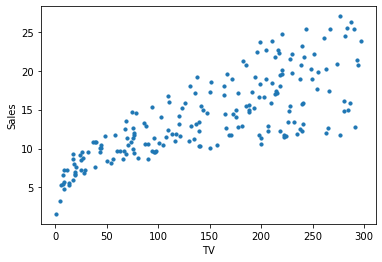

In [13]:
plot_graphic(X_tv, y_sales, 'TV', 'Sales')

In [14]:
SLR.fit(X_tv, y_sales)

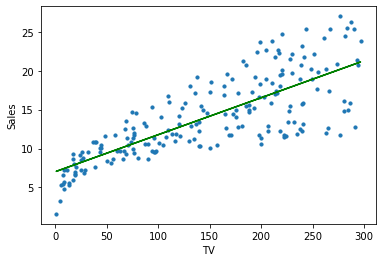

In [15]:
y_pred_tv_sales = SLR.predict(X_tv)

plot_linear_regression(X_tv, y_sales, y_pred_tv_sales, 'TV', 'Sales')

In [16]:
SLR.coef_()

[7.032593549127699, 0.04753664043301972]

#### Variável Radio contra Sales

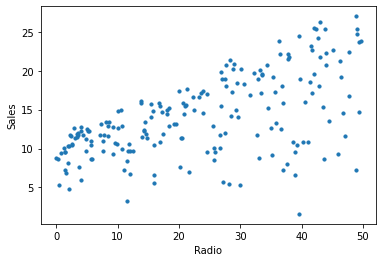

In [17]:
plot_graphic(X_radio, y_sales, 'Radio', 'Sales')

In [18]:
SLR.fit(X_radio, y_sales)

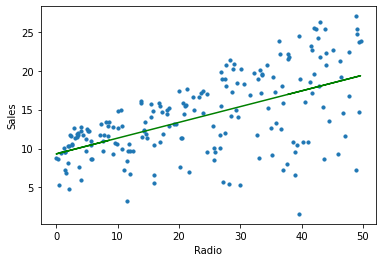

In [19]:
y_pred_radio_sales = SLR.predict(X_radio)

plot_linear_regression(X_radio, y_sales, y_pred_radio_sales, 'Radio', 'Sales')

In [20]:
SLR.coef_()

[9.311638095158287, 0.2024957833924395]

#### Variável Newspaper contra Sales

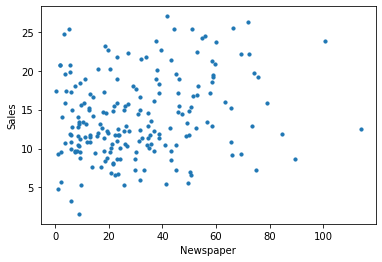

In [21]:
plot_graphic(X_newsp, y_sales, 'Newspaper', 'Sales')

In [22]:
SLR.fit(X_newsp, y_sales)

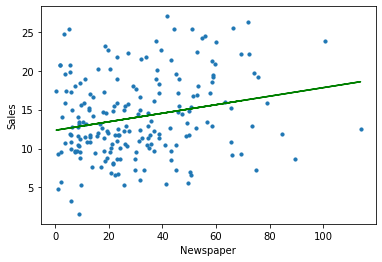

In [23]:
y_pred_newsp_sales = SLR.predict(X_newsp)

plot_linear_regression(X_newsp, y_sales, y_pred_newsp_sales, 'Newspaper', 'Sales')

In [24]:
SLR.coef_()

[12.351407069278157, 0.05469309847227348]

### 2.1 Reporte as métricas RSS, RSE, R2 e MAE

#### TV contra Sales

In [25]:
tv_sales = {
    'RSS': RSS(y_sales, y_pred_tv_sales),
    'RSE': RSE(y_sales, y_pred_tv_sales),
    'R2': R2(y_sales, y_pred_tv_sales),
    'MAE': MAE(y_sales, y_pred_tv_sales)
}

tv_sales

{'RSS': 2102.5305831313517,
 'RSE': 2.917645097618413,
 'R2': 0.611875050850071,
 'MAE': 2.5498060389274864}

#### Variável Radio contra Sales

In [26]:
radio_sales = {
    'RSS': RSS(y_sales, y_pred_radio_sales),
    'RSE': RSE(y_sales, y_pred_radio_sales),
    'R2': R2(y_sales, y_pred_radio_sales),
    'MAE': MAE(y_sales, y_pred_radio_sales)
}

radio_sales

{'RSS': 3618.479549025088,
 'RSE': 4.011533091615403,
 'R2': 0.33203245544529525,
 'MAE': 3.3202187976420667}

#### Variável Newspaper contra Sales

In [27]:
newsp_sales = {
    'RSS': RSS(y_sales, y_pred_newsp_sales),
    'RSE': RSE(y_sales, y_pred_newsp_sales),
    'R2': R2(y_sales, y_pred_newsp_sales),
    'MAE': MAE(y_sales, y_pred_newsp_sales)
}

newsp_sales

{'RSS': 5134.804544111939,
 'RSE': 4.865595823797913,
 'R2': 0.05212044544430516,
 'MAE': 4.1465597438384885}

### 3. Aplicando a Regressão Linear Múltipla e reportando os coeficientes

In [28]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X.shape, y.shape

((200, 3), (200,))

In [29]:
LR = LinearRegression()

In [30]:
LR.fit(X, y)

In [31]:
y_pred = LR.predict(X)

In [32]:
LR.coef_()

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [33]:
metrics = {
    'RSS': RSS(y, y_pred),
    'RSE': RSE(y, y_pred),
    'R2': R2(y, y_pred),
    'MAE': MAE(y, y_pred)
}

metrics

{'RSS': 556.8252629021872,
 'RSE': 0.8855090708236343,
 'R2': 0.8972106381789522,
 'MAE': 1.2520112296869497}